In [4]:
import matplotlib.pyplot as plt

In [37]:
%run linear_algebra.py
%run statistics.py

# 가설과 추론


## 1. 통계적 가설 검정 (statistical hypothesis testing)
>- 데이터 뒤에 숨어있는 확률 변수의 분포와 모수에 대한 가설의 진위를 정량적(quantitatively)으로 증명하는 작업을 말한다.
    - 귀무가설 (H0, null hypothesis) : 검정하고 싶은 기본 가설
    - 대립가설 (H1, alternative hypothesis) : 비교하고 싶은 가설

## 2. 동전던지기 예시
> - 하나의 동전이 공평한 동전인지 아닌지 검정
    - 앞면이 나올 확률 = p
    - 귀무 가설 : p = 0.5
    - 대립 가설 : p != 0.5

In [2]:
## 동전던지기는 베르누이 시행, n번 던지기는 이항분포
## (n이 충분히 크다면) 이항분포는 정규분포로 근사할 수 있다.

def normal_approximation_to_bionomial(n, p):
    import math
    """Binomial(n, p)에 해당되는 평균과 표준편차 계산"""
    mu = p * n
    sigma = math.sqrt(p*(1-p)*n)
    return mu, sigma

In [ ]:
############################# 스터디원 코드 #############################






In [5]:
## 확률변수가 정규분포를 따른다는 가정하에, normal_cdf를 사용하면 실제 동전 던지기로부터 얻은 값이 
## 구간 안(혹은 밖)에 존재할 확률을 계산할 수 있다.

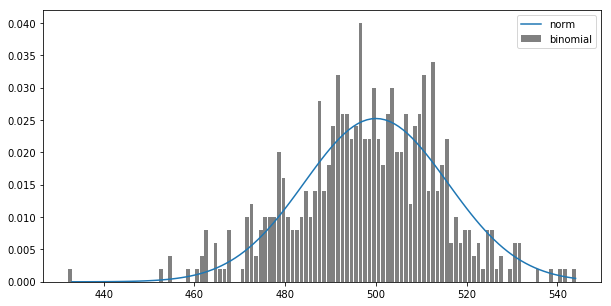

In [40]:
make_hist(0.5, 1000, 500)

In [6]:
# 누적분포함수는 확률변수가 특정 값보다 작을 확률을 나타낸다.

normal_probability_below = normal_cdf

# 만약 확률변수가 특정 값보다 작지 않다면, 특정 값보다 크다는 것을 의미한다.
def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)
    
# 만약 확률변수가 hi보다 작고 lo보다 작지 않다면, 확률변수는 hi와 lo사이에 존재한다.
def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

# 만약 확률변수가 범위 밖에 존재한다면, 범위 안에 존재하지 않다는 것을 의미한다.
def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)

def normal_upper_bound(probability, mu=0, sigma=1):
    """P(Z <= z) = probability 인 z값 반환"""
    return inverse_normal_cdf(probability, mu, sigma)
    
def normal_lower_bound(probability, mu=0, sigma=1):
    """P(Z >= z) = probability 인 z값 반환"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """입력한 probability 값을 포함하고 평균을 중심으로 대칭적인 구간"""
    tail_probability = (1 - probability) / 2

    # 구간의 상한은 tail_probability값 이상의 학률 값을 갖고 있다.
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    # 구간의 하한은 tail_probability값 이하의 학률 값을 갖고 있다.
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound

In [8]:
# n이 1000, p = 0.5 인 이항확률변수의 평균, 표준편차

mu_0, sigma_0 = normal_approximation_to_bionomial(1000, 0.5)
mu_0, sigma_0

(500.0, 15.811388300841896)

In [ ]:
############################# 스터디원 코드 #############################






> ### 유의수준, 검정력
- **유의 수준**
    - 1종 오류 ($\alpha$) : $H_0$가 참이지만 $H_0$를 기각하는 false positive 오류.
    - ***유의 수준*** : 1종 오류를 얼마나 허용해줄 것인지를 의미한다.
    - 일반적으로 5%, 1%로 설정하는 경우가 많다.    
- **검정력**
    - 2종 오류 ($\beta$) : $H_0$가 거짓이지만 $H_0$를 기각하지 않는 오류를 의미
    - ***검정력*** : 2종 오류를 범하지 않을 확률 ( 1 - $\beta$ )

In [13]:
## X가 주어진 범위를 벗어나면 귀무가설을 기각하는 가설검정을 고려해보자
## n이 1000, p = 0.5 인 이항확률변수에서 5% 미만은 평균이 530이상 이거나, 469이하이다.

normal_two_sided_bounds(0.95, mu_0, sigma_0)

(469.01026640487555, 530.9897335951244)

In [14]:
## p = 0.55인 경우의 검정력

# p가 0.5라고 가정할 때, 유의수준이 5%인 구간
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)

# p=0.55인 경우의 실제 평균과 표준 편차

mu_1, sigma_1 = normal_approximation_to_bionomial(1000, 0.55)

In [16]:
## 2종 오류란 귀무가설을 기각하지 못한다는 의미
## 즉, 우리가 검정하고자 하는 X가 p=0.55인 정규분포에 있을 확률???

type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability
power

0.8865480012953671

In [ ]:
############################# 스터디원 코드 #############################






> - 귀무가설이 어떤지에 따라 검정력을 구하는 방법이 달라진다.
    - 단측 검정
    - 양측 검정

## 3. p-value
> - H_0가 참이라고 가정하고 실제로 관측된 값보다 더 극단적인 값이 나올 확률을 구하는 것

In [17]:
def two_sided_p_value(x, mu=0, sigma=1):
    if x>- mu:
        # 만약 x가 평뷴보다 크다면, x보다 큰 부분이 꼬리다.
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # 만약 x가 평균보다 작다면, x보다 작은 부분이 꼬리다
        return 2 * normal_probability_below(x, mu, sigma)

In [20]:
two_sided_p_value(529.5, mu_0, sigma_0)

0.06207721579598857

In [ ]:
## 530 대신 529.5를 사용한 이유?
## 연속수정때문

In [24]:
import random
extreme_value_count = 0
for _ in range(100000):
    num_heads = sum(1 if random.random() < 0.5 else 0
                   for _ in range(1000))
    if num_heads >= 530 or num_heads <= 470:
        extreme_value_count += 1

print(extreme_value_count/100000)

0.06221


In [25]:
two_sided_p_value(531.5, mu_0, sigma_0)

0.046345287837786575

In [ ]:
############################# 스터디원 코드 #############################






In [26]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

In [27]:
upper_p_value(524.5, mu_0, sigma_0)

0.06062885772582083

In [28]:
upper_p_value(526.5, mu_0, sigma_0)

0.04686839508859242

In [ ]:
############################# 스터디원 코드 #############################






## 4. 신뢰구간
> - 사건에 대한 분포를 사전에 알지 못한다면 관측된 값에 대한 신뢰구간을 사용하여 가설을 검정할 수 있다.

In [31]:
import math
p = 0.525
math.sqrt(p * (1-p)/1000)

0.015791611697353755

In [33]:
p_hat = 525/1000
mu = p_hat
sigma = math.sqrt(p_hat*(1-p_hat)/1000)
sigma

0.015791611697353755

In [34]:
normal_two_sided_bounds(0.95, mu, sigma)

(0.4940490278129096, 0.5559509721870904)

In [35]:
p_hat = 540/1000
mu = p_hat
sigma = math.sqrt(p_hat*(1-p_hat)/1000)
sigma

0.015760710643876435

In [ ]:
############################# 스터디원 코드 #############################






## 5. p-value 해킹

In [36]:
def run_experiment():
    import random
    """동전을 1000번 던져서, True = 앞면, False = 뒷면"""
    return [random.random() < 0.5 for _ in range(1000)]

In [37]:
def reject_fairness(experiment):
    """유의수준을 5%로 설정"""
    num_heeads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heeads > 531

In [40]:
random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment for experiment in experiments if reject_fairness(experiment)])
print(num_rejections)

28


In [ ]:
############################# 스터디원 코드 #############################






## 6. A/B test
> -  광고 예시
    - A라는 광고를 클릭 O/X는 베르누이 시행
    - 평균 : $p_A =  a_A/N_A$
    - 표준편차 : $\sigma_A =  \sqrt{P_A(1-P_A)/N_A}$
    - $N$이 충분히 크다면 정규분포에 근접한다.



In [65]:
def estimated_parameters(N, n):
    import math
    """N = 광고 노출자수, n = 광고 클릭자수"""
    p = n / N
    sigma = math.sqrt(p*(1-p)/N)
    return p, sigma

> #### 광고A와 B의 평균 클릭률의 차이가 있는지 없는지를 검정한다.
- 평균 : $p_B - p_A$
- 표준편차 : $\sqrt{\sigma^2_A + \sigma^2_B}$
    - $Var(X \pm Y) = Var(X) + Var(Y)$
- 평균은 $p_B - p_A$, 표준편차는 $\sqrt{\sigma^2_A + \sigma^2_B}$인 정규분포를 따른다.
    
    
> #### Variance Sum Law
- $Var(X) = E[X^2] -(E[X])^2$
- $Var(X+Y) = E[(X+Y)^2] -(E[(X+Y)])^2$  
$= E[(X^2+2XY+Y^2)] -(E[X]^2+2E[X]E[Y]+E[Y]^2)$  
$=E[X^2] - E[X]^2 + E[Y^2] - E[Y]^2$  
$=Var(X) + Var(Y)$

In [ ]:
############################# 스터디원 코드 #############################






In [66]:
## 원래는 t 분포를 사용해야되지만, 데이터의 수가 많으면 정규분포를 따른다고 봐도 무방하다.

1) 표준 정규 분포의 Z값 계산  
> ### $Z = \frac{X-\mu} {\sigma}$  


2) Z값의 확률 계산

In [68]:
def a_b_test_statistics(N_A, n_A, N_B, n_B):
    import math
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A **2 + sigma_B **2) ## ((p_B - p_A) - 0) / math.sqrt(sigma_A **2 + sigma_B **2)

In [69]:
## N_A = 1000, n_A = 200, N_B = 1000, n_B = 180 이라면, 

z = a_b_test_statistics(1000, 200, 1000, 180)

In [71]:
z

-1.1403464899034472

In [72]:
two_sided_p_value(z)

0.254141976542236

In [ ]:
## 0.25 > 0.05 이므로 귀무가설을 기각하지 못한다. 
## 두 광고가 동일하게 효과적이라면 이런 차이가 발생할 가능성이 25%이다.

In [74]:
## N_A = 1000, n_A = 200, N_B = 1000, n_B = 150 이라면, 

z = a_b_test_statistics(1000, 200, 1000, 150)
two_sided_p_value(z)

0.003189699706216853

In [ ]:
## 두 광고가 동일하게 효과적이라면 이런 차이가 발생할 가능성이 3%이다.

In [ ]:
############################# 스터디원 코드 #############################






## 7. 베이지안 추론

In [41]:
def B(alpha, beta):
    """모든 확률 값의 합이 1이 되도록 해주는 정규화 값"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

In [42]:
def beta_pdf(x, alpha, beta):
    if x < 0 or x > 1:
        return 0
    return x ** (alpha -1 ) * (1-x) ** (beta - 1) / B(alpha, beta)

In [43]:
import math

In [52]:
import matplotlib.pyplot as plt

In [63]:
arr = []
for i in range(1, 10):
    print(i, math.gamma(i))


1 1.0
2 1.0
3 2.0
4 6.0
5 24.0
6 120.0
7 720.0
8 5040.0
9 40320.0


In [64]:
import numpy as np
arr_1 = []
for i in np.arange(1, 10, 0.5):
    print(i, math.gamma(i))

1.0 1.0
1.5 0.886226925452758
2.0 1.0
2.5 1.3293403881791372
3.0 2.0
3.5 3.323350970447842
4.0 6.0
4.5 11.631728396567446
5.0 24.0
5.5 52.34277778455352
6.0 120.0
6.5 287.8852778150444
7.0 720.0
7.5 1871.2543057977882
8.0 5040.0
8.5 14034.407293483413
9.0 40320.0
9.5 119292.46199460902
